In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [24]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('iri-pci.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(0, inplace=True)
# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('iri-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('iri-cleaned.csv')

any nan = False
all finite = True


In [25]:
# Take a quick look at the dataset
df.head()

,PCI,IRI
0,48.0,7.10
1,48.0,7.23
2,50.0,6.98
3,50.0,6.88
4,0.0,16.25


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCI     283 non-null    float64
 1   IRI     283 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [27]:
df.describe()

,PCI,IRI
count,283.000000,283.000000
mean,62.164311,5.070177
std,18.642361,2.633501
min,0.000000,0.560000
25%,50.000000,2.950000
50%,62.000000,4.900000
75%,76.000000,6.560000
max,100.000000,16.250000


#### Creation of Linear Regression Objects

In [28]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



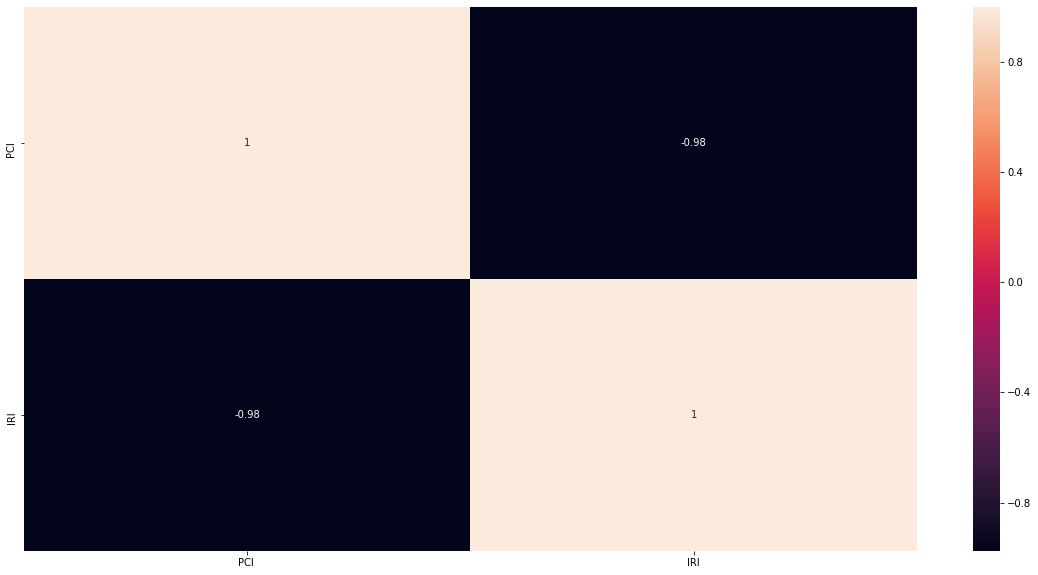

In [29]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = df.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

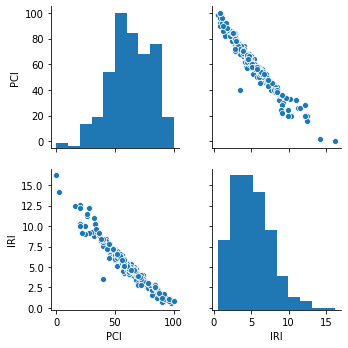

In [13]:

sns.pairplot(df)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

In [22]:

# Initialize a list to store the beta values for each linear regression model


# Loop over all the predictors
# In each loop "i" holds the name of the predictor 
    
# Set the current predictor as the variable x_train

# Create a linear regression object
linreg = LinearRegression()

# Fit the model with training data 
# Remember to choose only one column at a time i.e. given by x_train (not X_train)
linreg.fit(X_train,y_train)

# Add the coefficient value of the model to the list
linreg.coef_
linreg.score(X_test, y_test)



0.9582751791238531

In [17]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [19]:

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
print(multi_coef)
multi_linear.score(X_test,y_test)


[ 1.04402334e-01  9.05520620e-01  1.54636738e+00  4.35506044e-01
  1.17226438e-01  3.15143921e-01  8.17138006e-01 -6.31359587e-03
  3.15105435e-01  5.50813655e-01  4.09893427e-01  1.77009624e+00
 -2.49280747e-01 -2.99132875e-03  5.15247895e-01  4.63844089e+00
  8.34008486e+00  1.16573550e+01 -1.63606134e-01  4.43322127e-01
  1.64598082e+00  3.89153961e-01  3.76249247e-01  5.07516571e-01]


0.24756251897763815

#### Printing the individual $\beta$ values

By simple(one variable) linear regression for each variable:
'Value of beta1 = 3.61'
'Value of beta2 = -2.89'
'Value of beta3 = -10.95'
'Value of beta4 = -3.49'
